#### <h2>Statistics: The Science of Decisions Project Instructions</h2>

Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation

<b>As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.</b>
**1.** What is our **independent variable**? What is our **dependent variable**?

**2.** What is an **appropriate set of hypotheses** for this task? What **kind of statistical test** do you expect to perform? Justify your choices.

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

**3.** **Report some descriptive statistics** regarding this dataset. Include at least one **measure of central tendency** and at least one **measure of variability**.


**4.** Provide one or two **visualizations that show the distribution of the sample data**. Write one or two sentences noting what you observe about the plot or plots.

**5.** Now, **perform the statistical test and report your results**. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**6.** Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**_________**



**1a) Independent variable**

In a stroop task experiment, the independent variable is whether or not the ink color of the listed words match the written color name. When the color and word match we call it the congruent word condition, andthe incongruent word condition when the color and color name are different. We can call this binary variable Color Match.

**1b) Dependent variable**

The dependent variable is time it takes to name the ink colors, in equally sized lists. Each participant will go through the experiment and record a time for both conditions, starting with the congruent condition.

**2a) Hypotheses**

The null hypothesis for this project is that Color Match has no effect on the mean time it takes the participants to solve the tasks.

The alternative hypothesis is that a positive Color Match (the congruent condition) lowers the mean time it takes the participants to solve the tasks.

Mathematically, we can display the hypotheses like this:

$\overline X_1 =$ mean time of the congruent condition in the sample

$\overline X_2 =$ mean time of the incongruent condition in the sample

$H_0:  \overline X_1 = \overline X_2$

$H_A:  \overline X_1 < \overline X_2$



**2b) Statistical test**

A dependent two sample T-test will be used for this task, as the task has a repeated measures design. This means that the same subjects takes both tests, and their results are recorded for comparison.

Another option would be to use repeated measures ANOVA. As the independent variable only has two levels in the stroop task, I have decided to use the paired T-test instead. 


**3a) Descriptive statistics**

In [104]:
import pandas as pd
df = pd.read_csv('data_files/stroopdata.csv')
des_stats = df.describe()
des_stats

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [105]:
df[['Congruent','Incongruent']]

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


**4) Visualization: plot**

Populating the interactive namespace from numpy and matplotlib


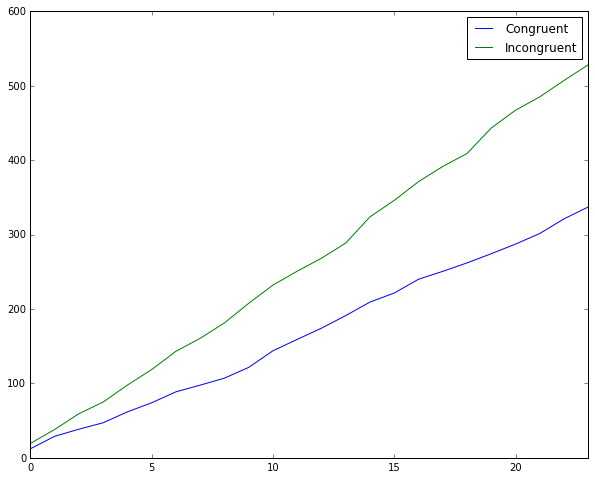

In [106]:
%pylab inline
import matplotlib.pyplot as plt

df[['Congruent','Incongruent']].cumsum().plot(figsize=(10, 8))

This  plot shows the total absolute differences between the Congruent and Incongruent test results. As the number of test results increases, the difference appears to increase as well.

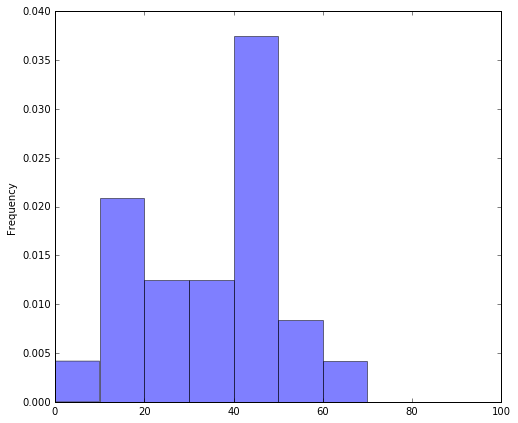

In [107]:
df['diff'] = df['Incongruent']-df['Congruent']
#Adding a new column with percentage difference between Incongruent and Congruent results
df['%_faster'] = (df['diff']/df['Incongruent'])*100

df['%_faster'].plot.hist(alpha=0.5,range=[0,100],figsize=(8,7),normed=True)

This histogram visualizes how much faster the Congruent test results are, sorted in 10% bins. We see that 37% of the test subjects scored between 40 and 50% higher on the Congruent test than the Incongruent test.

**5a) Statistical tests**

As mentioned earlier, I will perform a paired t-test to test for statistical significance of the samples. I will set the alpha level at 0.05. For a If significant, I will also measure the effect size using Cohen's d.

In [108]:
#t-critical value, from t-table (https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)
deg_free=len(df.index)-1
print(deg_free)

23


In [109]:
al_lv = 0.05
t_crit_val = 2.069

print("The degrees of freedom is {0} and the alpha level is {1}. This gives a t-critical value of {2}".format(deg_free,al_lv,t_crit_val))

The degrees of freedom is 23 and the alpha level is 0.05. This gives a t-critical value of 2.069


In [110]:
from scipy import stats
import numpy as np
#paired t-test
#inf_stats = pd.DataFrame(columns=('test','test2'))
#inf_stats.index=('T-test')
#n = len(df.index)

t_statistic,p_value = stats.ttest_rel(df['Congruent'],df['Incongruent'])
from decimal import *
#converting p_value to fixed number for clarity
p_value = '{0:.10f}'.format(p_value)

print(t_statistic,p_value)

-8.02070694411 0.0000000410


In [111]:
#getting descriptive statistics for the difference
des_stats = df.describe()
#calculating Cohen's d
cohen_d = des_stats.loc['mean','diff']/des_stats.loc['std','diff']

print(cohen_d)

1.63721994912


According to the Cohen's D value, the difference between the two means (the effect) is 1.67 standard deviations. This is considered a large effect size.
http://mandeblog.blogspot.no/2011/05/cohens-d-and-effect-size.html

In [112]:
# #Will most likely not include
# slope, intercept, r_value, p_value, std_err = stats.linregress(df['Congruent'],df['Incongruent'])

# print(r_value,p_value)
# r_squared = r_value ** 2
# print(r_squared)

# r_squared2= t_statistic ** 2 / (t_statistic ** 2 + 2)

# print(r_squared2)

In [113]:
df['diff']
df.axes
des_stats

,Congruent,Incongruent,diff,%_faster
count,24.000000,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792,34.950316
std,3.559358,4.797057,4.864827,16.118201
min,8.630000,15.687000,1.950000,8.954494
25%,11.895250,18.716750,3.645500,20.050451
50%,14.356500,21.017500,7.666500,38.775726
75%,16.200750,24.051500,10.258500,46.351071
max,22.328000,35.255000,21.919000,63.926155


In [156]:
#Updating the descriptive statistics data frame to include diff
des_stats = df.describe()

#margin_of_error = t_crit_val * (des_stats.loc['std','diff'] / len(df.index))
margin_of_error = t_crit_val * stats.sem(df['diff'])

se1 = stats.sem(df['diff'])
se2 = des_stats.loc['std','diff'] / sqrt(len(df.index))

print(se2)

ci_low = des_stats.loc['mean','diff'] - margin_of_error
ci_high = des_stats.loc['mean','diff'] + margin_of_error

print("Confidence interval for sample difference: ({0}, {1})".format(ci_low,ci_high))

"""
Alternative way of calculating Confidence Interval (gives same result, but need to understand better before using)
#import math
#CI = stats.t.interval(0.95,len(df.index)-1,loc=des_stats.loc['mean','diff'],scale=des_stats.loc['std','diff']/math.sqrt(len(df.index)))
#print(CI)
"""

0.993028634778
Confidence interval for sample difference: (5.91021542131028, 10.019367912023053)
(5.9105554239684226, 10.019027909364912)



paired t-test
cohen's d
#r^2

CI

**5b) Statistical test observations**

6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? **Some research about the problem will be helpful for thinking about these two questions!**